# Uvod v Python in knjižnico SimpleITK
Vaja služi spoznavanju osnovnih ukazov za nalaganje, prikazovanje, shranjevanje slik in upravljanje z
digitalnimi slikami v programskem jeziku Python. V jeziku Python lahko sivinske slike predstavimo
z dvorazsežnimi polji ndarray v knjižnici NumPy, v katerih so slikovni elementi običajno shranjeni kot
nepredznačena 8-, 16- ali 32-bitna cela števila ali v zapisu s plavajočo vejico ([Tabela 1](#tabela1)).

<a id='tabela1'></a>
### Tabela 1: Zapis sivinskih vrednosti s podatkovnimi tipi knjižnice numpy. 

| Zapis sivin                 | Podatkovni tip (`dtype`)   | Zaloga vrednosti              |
| :-------------------------- | :------------------------- | :---------------------------- |
| binarna slika               | `'bool'`                   | { `False` , `True` }          |
| 8-bitni nepredznačeni       | `'uint8'`                  | \[0, 255\]                    |
| 16-bitni nepredznačeni      | `'uint16'`                 | \[0, 65535\]                  |
| 32-bitni predznačeni        | `'int32'`                  | \[-2\(^{31}\), 2\(^{31}\)-1\] |
| 32-bitni s plavajočo vejico | `'float32'` ali `'single'` | \[0.0, 1.0\]                  |
| 64-bitni s plavajočo vejico | `'float64'` ali `'double'` | \[0.0, 1.0\]                  |


Knjižnico **NumPy** naložimo z ukazom `import numpy as np`, do funkcij 
in spremenljivk v knjižnici pa dostopamo z `np.*` Nekatere uporabne funkcije za inicializacijo polja `ndarray` so `zeros()`, `ones()`, `zeros_like()`, `ones_like()`, `asarray()`, za pretvorbo tipa podatka `astype()` ali `array(mArray, dtype=...)`, za branje števila dimenzij `ndim()` in velikosti `shape()` polja in za preoblikovanje polja `reshape()` in `transpose()` (glej tudi vajo *0b - Uvod v Python*). Dvodimenzionalno polje `mArray` naslavljamo z npr. `mArray[0,3]` (element v ničti vrstici, tretjem stolpcu), `mArray[:,1]` (prvi stolpec), `mArray[-1,:]` (zadnja vrstica), itd. Indekse v sliki za logične izraze nad elementi slike lahko iščemo z ukazom `where()`. Koordinatni sistem slike in primeri naslavljanja elementov v sliki so prikazani na spodnji sliki. 

<img src="data/slika1.png" alt="Analiza medicinskih slik" style="float;left;width: 800px;"/>

Za branje in pisanje slik v surovem (nezgoščenem) zapisu sta v knjižnici **NumPy** uporabni funkciji `fromfile()` in `tofile()`. Za branje in pisanje slik v standardnih formatih (bmp, png, gif, eps, jpeg, itd.) pa lahko uporabimo knjižnico `PIL.Image` (če pri uvažanju knjižnice Python javi napako, potem jo najprej naložite v ukaznem oknu z ukazom `pip install pillow`). Sliko naložimo s funkcijo `open()`, ki ustvari spremenljivko tipa `Image`. Zapis slikovnih elementov v sliki preverimo z ukazom `getbands()`. S funkcijo `numpy.array` to spremenljivko pretvorimo v `numpy` podatkovno polje. Sliko v obliki `numpy` polja pretvorimo nazaj v tip `Image` s funkcijo `Image.fromarray()`. Slike tipa `Image` lahko pretvorimo v poljuben format s funkcijo `Image.convert()` in shranimo z ukazom `save()`.

Za prikazovanje slik lahko uporabite knjižnico `matplotlib.pyplot`. Ta modul uvozite z ukazoma:
```python
%matplotlib notebook
import matplotlib.pyplot as plt
```
Za izris slike je uporabna funkcija `imshow()`, za urejanje osi pa `suptitle()`, `xlabel()` in `ylabel()`, `axes()`.

## Gradivo

Gradivo za vajo vsebuje dve 2D sliki, prva `data/zob-microct.png` je slika rezine zoba zajeta na mikro CT napravi, druga `data/misice-microscope.png` pa mikroskopska slika mišičnih vlaken. [Slika](#prikaz-obdelanih-slik) prikazuje dani 2D sivinski sliki. Sledi nekaj osnovnih vaj za trening sintakse in uporabe knjižnic in funkcij. 

## Naloge
1. Uporabite knjižnico `PIL.Image` za nalaganje slike `data/zob-microct.png` v spremenljivo v okolju Python in nato sliko pretvorite v 2D polje tipa `numpy.array`.

In [5]:
import PIL.Image as pil
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

path = 'data/zob-microct.png'

Matplotlib is building the font cache; this may take a moment.


In [7]:
# YOUR CODE HERE
%matplotlib inline
img = pil.open(path)
np_img = np.array(img)

2. Uporabite knjižnico `matplotlib.pyplot` za prikaz slike v obliki 2D polja v spremenljivki tipa `numpy.array`.

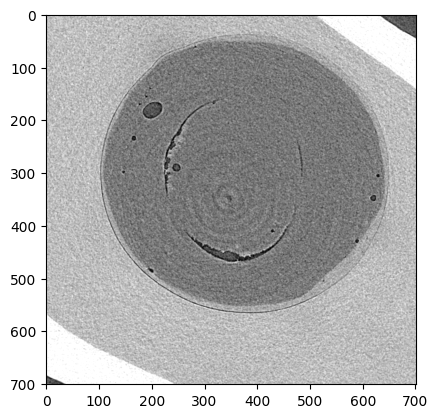

In [8]:
# YOUR CODE HERE
plt.figure()
plt.imshow(np_img, cmap='gray')
plt.show()

3. Iz originalne slike izluščite pravokotno podokno, ki ima $x$ in $y$ dimenzijo polovico manjše kot ustrezni $x$ in $y$ dimenziji originalne slike. Prikažite izluščeno pravokotno podokno.

In [3]:
# YOUR CODE HERE


4. Shranite izluščeno podokno slike v datoteko formata '.jpg'.

In [4]:
# YOUR CODE HERE

## Knjižnica `SimpleITK`
Python knjižnica SimpleITK www.simpleitk.org je poenostavljen vmesnik do knjižnice ITK (Insight Segmentation and Registration Toolkit, www.itk.org}, ki je originalno napisana v jeziku C++ in ki je odprtokodna knjižnica s širokim naborom osnovnih in naprednih algoritmov ter programskih orodij za analizo (medicinskih) slik.

Knjižnico SimpleITK lahko enostavno naložimo v katerokoli Python okolje tako, da v ukazni vrstici izvedemo naslednji ukaz:
```bash
pip3 install SimpleITK
```
Knjižnico lahko nato uvozite v Python okolje z ukazom:
```python
import SimpleITK as sitk
```
kjer smo kot ime knjižnice uporabili kratek psevdonim `sitk`. [Tabela 2](#tabela2) podaja opis osnovnih objektov in funkcij v knjižnici SimpleITK.

<a id='tabela2'></a>
### Tabela 2: Opis osnovnih objektov in funkcij v knjižnici SimpleITK.

| Element                     | Tip elementa               | Opis                          |
| :-------------------------- | :------------------------- | :---------------------------- |
| `sitkUInt8`, `sitkInt16`, `sitkFloat32`,...               | celoštevilka konstanta, število s plavajočo vejico,...                  | določa podatkovni tip elementov slike          |
| `Image` | objekt | vsebuje metapodatke o sliki in vrednosti elementov 2D ali 3D slike |
| `Image(size, valueEnum)` | konstruktor objekta `Image` | v `size` podamo velikost slike v spremenljivki `list` ali `tuple`, v `valueEnum` pa tip podatka, npr. `sitkUInt8` |
|`Image.GetPixelIDValue()`| funkcija objekta `Image` | vrne tip podatka v sliki v obliki celoštevilske konstante (npr. `sitkFloat32`) |
|`Image.GetPixelIDTypeAsString()`| funkcija objekta `Image` | vrne tip podatka v sliki v obliki besede `str` |
|`Image.GetSize()` | funkcija objekta `Image` | vrne vektor `tuple` z velikostmi slik v posamezni dimenziji |
|`Image.GetSpacing()` `Image.SetSpacing(spacing)`| funkcija objekta `Image` | vrne oziroma nastavi korak vzorčenja v posamezni dimenziji slike |
|`Image.GetOrigin()` `Image.SetOrigin(origin)`| funkcija objekta `Image` | vrne oziroma nastavi vektor s koordinatami izhodišča slike |
|`Image.GetDirection()` `Image.SetDirection(direction)`| funkcija objekta `Image` | vrne oziroma nastavi $2\times 2$ ali $3\times 3$ matriko smernih vektorjev 2D ali 3D slike, ki predstavljajo smeri osi koordinatnega sistema dejanskega, fizičnega objekta |
|`ReadImage(filename, outputPixelType)` | funkcija | nalaganje slike v poljubnem formatu (`.png`, `.jpg`, `.nrrd`, `.nii.gz`, `.dcm`, ...), s parametrom `outputPixelType` lahko eksplicitno vnaprej določimo tip podatka, funkcija vrne sliko kot objekt tipa `Image` |
|`WriteImage(image, fileName, useCompression)` | funkcija | shranjevanje slike `image` v poljubnem formatu, ki ga določimo s končnico v imenu datoteke `fileName`, s parametrom `useCompression` vklopimo/izklopimo kompresijo podatkov |
|`GetArrayFromImage(image)` | funkcija | pretvori slikovne podatke v objektu `image` v spremenljivko `numpy.array` |
|`GetImageFromArray(array)`| funkcija | pretvori `numpy.array` polje v spremenljivki `array` v objekt tipa `sitk.Image`, pri čemer nastavi velikost slike in tip podatka, ostale lastnosti imajo privzete vrednosti |

## Naloge
V nadaljevanju vaje bomo spoznali uporabo nekaterih funkcij in manipulacijo z objektom tipa `sitk.Image`.
5. Ustvarite objekt tipa `sitk.Image` iz slike `data/zob-microct.png`. Preberite lastnosti objekta, kot so velikost slike, tip podatka, korak vzorčenja, izhodišče in smeri koordinatnega sistema.

In [16]:
# YOUR CODE HERE
sitk_img = sitk.ReadImage(path)
print(sitk_img.GetSize())
print(sitk_img.GetSpacing()) # Spacing ni shranjen v sliki, zato si simpleITK neki izmisl
print(sitk_img.GetOrigin())

(701, 701)
(1.0, 1.0)
(0.0, 0.0)


6. Ponastavite korak vzorčenja in izhodišče slike ter sliko shranite v datoteko formata `.nrrd`. Odprite datoteko kot tekstovno ASCII datoteko s poljubnim bralnikom in si oglejte zapis slike ter preverite lastnosti slike. Ponovite enako z uporabo formata `.nii.gz`.

In [20]:
# YOUR CODE HERE
sitk_img.SetSpacing([0.1, 0.1])
sitk.WriteImage(sitk_img, 'data/zob-microct.nii.gz')
sitk.WriteImage(sitk_img, 'data/zob-microct.nrrd')

7. Naložite datoteko v formatu `.nrrd` in dobljeni objekt `Image` pretvorite sliko v spremenljivko tipa `numpy.array`. Katere lastnosti slike se pri tem *izgubijo*?

In [21]:
# YOUR CODE HERE
print(sitk.ReadImage('data/zob-microct.nii.gz').GetSpacing())
print(sitk.ReadImage('data/zob-microct.nrrd').GetSpacing())
# YOUR ANSWER HERE

(0.10000000149011612, 0.10000000149011612)
(0.1, 0.1)


## Nekaj uporabnih povezav
* Na spletu je na voljo veliko primerov uporabe knjižnice SimpleITK, naprimer na spletni strani: http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks
* Za vajo osnov manipulacije z \verb+sitk.Image+ objektom priporočam ogled opisov in kode na povezavi: http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/03_Image_Details.html
* Dokumentacijo vseh funkcij v knjižnici najdete na spletni strani:  https://itk.org/SimpleITKDoxygen/html/index.html

## Obnova medicinskih slik s SimpleITK
Obnova medicinskih slik se uporablja za povečanje zaznavnosti objektov oz. struktur na slikah za namen boljše klinične interpretacije ali pa kot postopek predobdelave slik za nadaljnjo avtomatsko analizo slik. Obnova slik obsega postopke za povečanje kontrasta na slikah, poudarjanje robov, povečevanje sivinske in prostorske ločljivosti, za zmanjšanje šuma in prostorskih sivinskih nehomogenosti. 

Za potrebe avtomatske analize medicinskih slik se najbolj pogosto uporabljajo postopki za zmanjšanje šuma z nelinearnim filtriranjem, ki ohranja robove (ang. *edge-preserving smoothing*) in pa postopki za zmanjšanje prostorskih sivinskih nehomogenosti. [Slika (a)](#prikaz-obdelanih-slik) prikazuje rezini mikro CT (ang. *Computed Tomography*) slike zoba pred in po nelinearnem filtriranju za zmanjšanje šuma, [slika (b)](#prikaz-obdelanih-slik) pa mikroskopski sliki mišičnih vlaken pred in po zmanjšanju prostorskih sivinskih nehomogenosti.

<a id='prikaz-obdelanih-slik'></a>
### Prikaz obdelanih slik
![Prikaz vhodnih surovih in obdelanih slik ter vpliv na histogram slike](data/slika2.png)

(a) Rezini mikro CT slike zoba pred (*levo*) in po (*desno*) zmanjšanju šuma z nelinearnim filtriranjem. (b) Mikroskopski sliki mišičnih vlaken pred (*levo*) in po (*desno*) zmanjšanju prostorskih sivinskih nehomogenosti. Iz pripadajočih sivinskih histogramov je razvidno povečanje kontrasta med strukturami različnih sivin.

**Postopki za zmanjševanje šuma in prostorskih sivinskih nehomogenosti** imajo podoben cilj, to je, čim bolj zmanjšati variabilnosti sivinskih vrednosti v znotraj iste strukture, pri čemer predpostavljamo, da imajo iste oz. sorodne strukture homogeno sivinsko vrednost po celotnem vidnem polju. Razlika med tema dvema skupinama postopkov je, da prvi variabilnost signala zmanjšujejo lokalno drugi pa globalno. Pri razvoju teh postopkov lahko predpostavimo naslednji model degradacije sivinske slike:

<a id='enacba1'></a>
\begin{equation}
	f(x,y) = g(x,y) * m(x,y) + a(x,y) + n(x,y),
	\label{eq_degradacija}
\end{equation}

pri čemer je $f(x,y)$ zajeta, degradirana slika, $g(x,y)$ pa nedegradirana slika. Polji $m(x,y)$ in $a(x,y)$ predstavljata multiplikativno in aditivno sivinsko nehomogenost, $n(x,y)$ pa additivni šum.

**Postopki za zmanjšanje šuma** običajno predpostavljajo, da je pričakovana vrednost $E(\cdot)$ za komponento additivnega šuma enaka nič ($E(n(x,y))=0$), zato člen za šum v [gornji enačbi](#enacba1) odpade:

\begin{equation}
	E(f(x,y)) = E(g(x,y) * m(x,y)) + E(a(x,y)).
\end{equation}

Osnovni princip zmanjševanja šuma je torej lokalno povprečenje oz. filtriranje slike, ki jo najlažje izvedemo z lokalnim povprečenjem, še bolj robustna izvedba pa je z uporabo *medianinega* filtra. 

8. Uporabite funkciji za glajenje slike s povprečenjem in z mediano v knjižnici SimpleITK:
```python
# glajenje s povprečenjem
Mean(img, radius)
# glajenje z mediano
Median(img, radius)
```
kjer je `img` vhodna slika tipa `itk.Image`, parameter `radius` pa predstavlja radij filtra $K$, zato bo dejanska velikost filtra $2K+1$. Obe funkciji vrneta sliko v obliki spremenljivke tipa `itk.Image`. 
Preizkusite delovanje funkcij na 2D mikro CT sliki `data/zob-microct.png` in prikažite ter kritično ovrednotite ustreznost obnove slike.

In [8]:
# YOUR CODE HERE

In [17]:
# PLOT 

Glavna slabost teh filtrov je, da poleg variabilnosti signala zaradi šuma zmanjšujejo tudi variabilnost koristnega signala pri prehodu med dvema strukturama in posledično zabrišejo robove ali celo izničijo signal pomembne, drobne strukture. Zato se v praksi uporabljajo postopki z nelinearnim filtriranjem, ki ohranjajo robove, naprimer anizotropna difuzija (ang. *anisotropic diffusion*).

9. Uporabite funkcijo za gradientno anizotropno difuzijo v knjižnici SimpleITK:
```python
# anizotropna difuzija na podlagi operatorja odvajanja
GradientAnisotropicDiffusion(
    img, timeStep, conductanceParameter, 
    conductanceScalingUpdateInterval, numberOfIterations)
```
Z uporabo dokumentacije knjižnice SimpleITK raziščite pomen parametrov in ustrezno nastavite vrednosti parametrov. Funkcijo z vašimi nastavitvami parametrov preizkusite na 2D mikro CT sliki `data/zob-microct.png` in prikažite ter kritično ovrednotite ustreznost obnove slike.

In [ ]:
# YOUR CODE HERE
